**ALGORITMO: Local Binary Patterns (LBP)**<br>
Alumno: Daniel Iván Cruz Flores


Tamaño imagen 1: (189, 190, 3) pix
Tamaño imagen 2: (188, 188, 3) pix
Tamaño imagen 3: (189, 196, 3) pix
Tamaño imagen 4: (189, 188, 3) pix
Tamaño imagen 5: (190, 191, 3) pix




<Figure size 432x288 with 0 Axes>

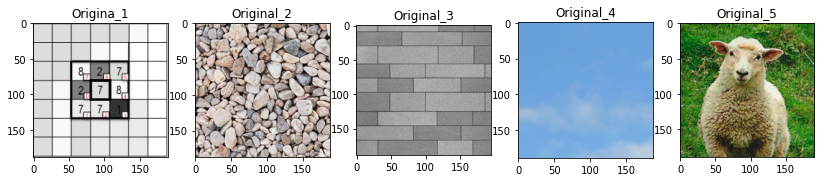

In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline  

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt


# Ahora quiero verla como imagen en color
img1 = cv.imread('Imagen1.png')
img2 = cv.imread('Imagen2.png')
img3 = cv.imread('Imagen3.png')
img4 = cv.imread('Imagen4.png')
img5 = cv.imread('Imagen5.png')



# Dimensión de la imagen
print('\nTamaño imagen 1: {} pix'.format(img1.shape))
print('Tamaño imagen 2: {} pix'.format(img2.shape))
print('Tamaño imagen 3: {} pix'.format(img3.shape))
print('Tamaño imagen 4: {} pix'.format(img4.shape))
print('Tamaño imagen 5: {} pix'.format(img5.shape))

print('\n')

# Paso la imagen de BRG a RGB
imgRGB1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
imgRGB2 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)
imgRGB3 = cv.cvtColor(img3,cv.COLOR_BGR2RGB)
imgRGB4 = cv.cvtColor(img4,cv.COLOR_BGR2RGB)
imgRGB5 = cv.cvtColor(img5,cv.COLOR_BGR2RGB)
################# FIG: originales ##############################################
# Nueva figura
fig = plt.figure()
plt.figure(figsize=(14,8))

# Imagen original
ax1=plt.subplot(151)
ax1.imshow(imgRGB1)
ax1.set_title('Origina_1')

ax2=plt.subplot(152)
ax2.imshow(imgRGB2)
ax2.set_title('Original_2')

ax3=plt.subplot(153)
ax3.imshow(imgRGB3)
ax3.set_title('Original_3')

ax2=plt.subplot(154)
ax2.imshow(imgRGB4)
ax2.set_title('Original_4')

ax3=plt.subplot(155)
ax3.imshow(imgRGB5)
ax3.set_title('Original_5')

fig.tight_layout()    
plt.show()

<Figure size 432x288 with 0 Axes>

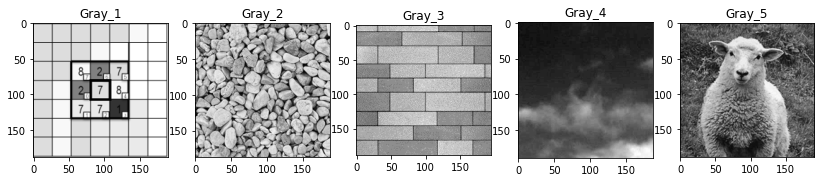

In [2]:
gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
gray3 = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)
gray4 = cv.cvtColor(img4, cv.COLOR_BGR2GRAY)
gray5 = cv.cvtColor(img5, cv.COLOR_BGR2GRAY)

# Nueva figura
fig = plt.figure()
plt.figure(figsize=(14,8))

# Imagen original
ax1=plt.subplot(151)
ax1.imshow(gray1,cmap="gray")
ax1.set_title('Gray_1')

ax2=plt.subplot(152)
ax2.imshow(gray2,cmap="gray")
ax2.set_title('Gray_2')

ax3=plt.subplot(153)
ax3.imshow(gray3,cmap="gray")
ax3.set_title('Gray_3')

ax2=plt.subplot(154)
ax2.imshow(gray4,cmap="gray")
ax2.set_title('Gray_4')

ax3=plt.subplot(155)
ax3.imshow(gray5,cmap="gray")
ax3.set_title('Gray_5')

fig.tight_layout()    
plt.show()

In [3]:
########################### Función LBP ########################################
def getLBP_image(gray_image):

    imgLBP = np.zeros_like(gray_image)
    vecino = 3 
    for ih in range(0,gray_image.shape[0] - vecino):
        for iw in range(0,gray_image.shape[1] - vecino):
            ### paso 1: 3 x 3 pixel
            img          = gray_image[ih:ih+vecino,iw:iw+vecino]
            center       = img[1,1]
            img01        = (img >= center)*1.0
            img01_vector = img01.T.flatten()
            
            ### paso 2: **Operación binaria**:
            img01_vector = np.delete(img01_vector,4) # quitamos el central del vector
            
            ### paso 3: lo pasamos a valores de sumas segun pesos.
            where_img01_vector = np.where(img01_vector)[0]
            if len(where_img01_vector) >= 1:
                num = np.sum(2**where_img01_vector)
            else:
                num = 0
            imgLBP[ih+1,iw+1] = num
    return(imgLBP)

<Figure size 432x288 with 0 Axes>

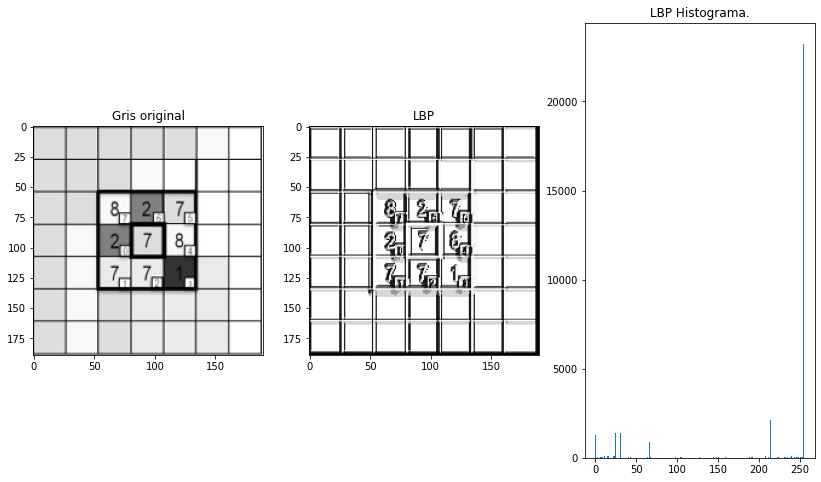

In [4]:
########################### LBP figura 1 #######################################
Img_LBP1=getLBP_image(gray1)
vector_imgLBP1 = Img_LBP1.flatten()

# Nueva figura
fig = plt.figure()
plt.figure(figsize=(14,8))

# Imagen original
ax1=plt.subplot(131)
ax1.imshow(gray1,cmap="gray")
ax1.set_title('Gris original')

# Imagen original
ax1=plt.subplot(132)
ax1.imshow(Img_LBP1,cmap="gray")
ax1.set_title('LBP')

# Imagen original
ax1=plt.subplot(133)
ax1.hist(vector_imgLBP1,bins=2**8)
ax1.set_title('LBP Histograma.')

#plt.tight_layout()    
plt.show()


<Figure size 432x288 with 0 Axes>

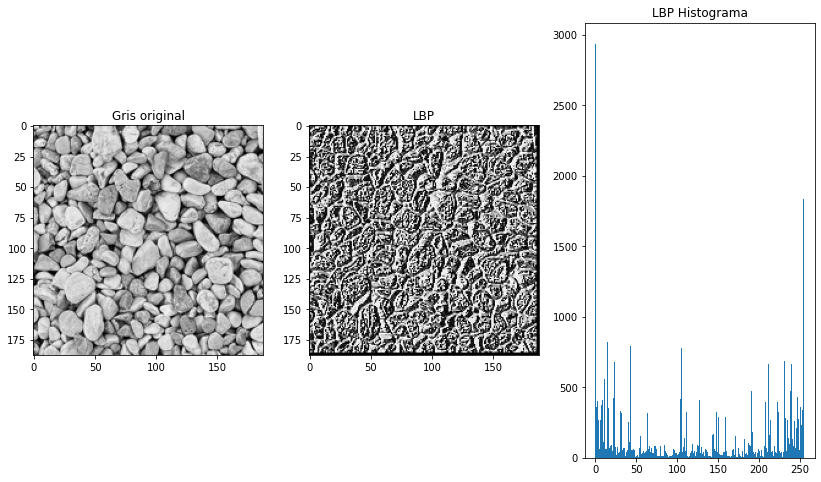

In [5]:
########################### LBP figura 2 #######################################
Img_LBP2=getLBP_image(gray2)
vector_imgLBP2 = Img_LBP2.flatten()

# Nueva figura
fig = plt.figure()
plt.figure(figsize=(14,8))

# Imagen original
ax1=plt.subplot(131)
ax1.imshow(gray2,cmap="gray")
ax1.set_title('Gris original')

# Imagen original
ax1=plt.subplot(132)
ax1.imshow(Img_LBP2,cmap="gray")
ax1.set_title('LBP')

# Imagen original
ax1=plt.subplot(133)
ax1.hist(vector_imgLBP2,bins=2**8)
ax1.set_title('LBP Histograma')

#plt.tight_layout()    
plt.show()

<Figure size 432x288 with 0 Axes>

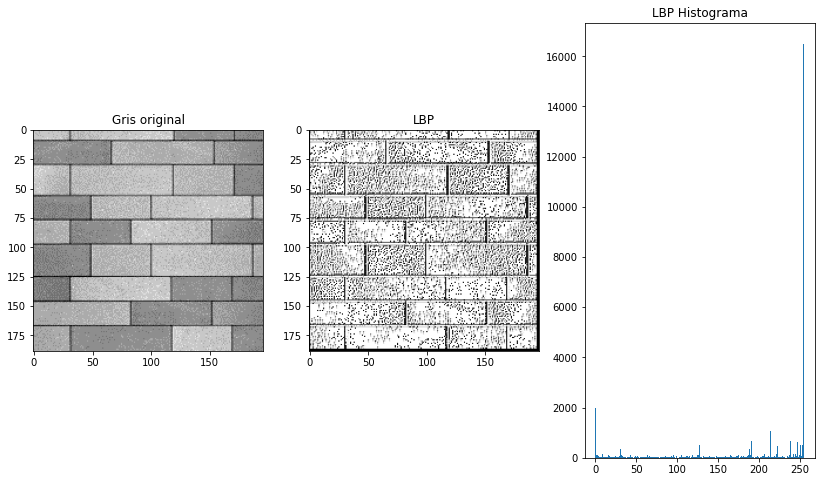

In [6]:
########################### LBP figura 3 #######################################
Img_LBP3=getLBP_image(gray3)
vector_imgLBP3 = Img_LBP3.flatten()

# Nueva figura
fig = plt.figure()
plt.figure(figsize=(14,8))

# Imagen original
ax1=plt.subplot(131)
ax1.imshow(gray3,cmap="gray")
ax1.set_title('Gris original')

# Imagen original
ax1=plt.subplot(132)
ax1.imshow(Img_LBP3,cmap="gray")
ax1.set_title('LBP')

# Imagen original
ax1=plt.subplot(133)
ax1.hist(vector_imgLBP3,bins=2**8)
ax1.set_title('LBP Histograma')

#plt.tight_layout()    
plt.show()

<Figure size 432x288 with 0 Axes>

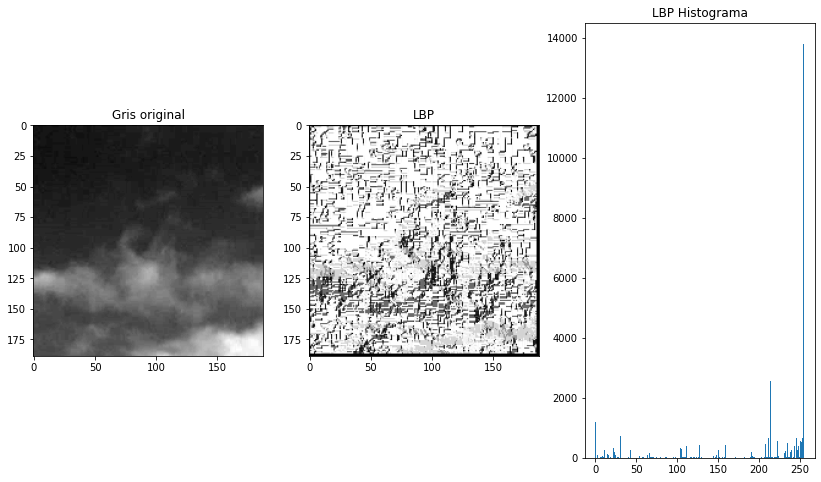

In [7]:
########################### LBP figura 4 #######################################
Img_LBP4=getLBP_image(gray4)
vector_imgLBP4 = Img_LBP4.flatten()

# Nueva figura
fig = plt.figure()
plt.figure(figsize=(14,8))

# Imagen original
ax1=plt.subplot(131)
ax1.imshow(gray4,cmap="gray")
ax1.set_title('Gris original')

# Imagen original
ax1=plt.subplot(132)
ax1.imshow(Img_LBP4,cmap="gray")
ax1.set_title('LBP')

# Imagen original
ax1=plt.subplot(133)
ax1.hist(vector_imgLBP4,bins=2**8)
ax1.set_title('LBP Histograma')

#plt.tight_layout()    
plt.show()

<Figure size 432x288 with 0 Axes>

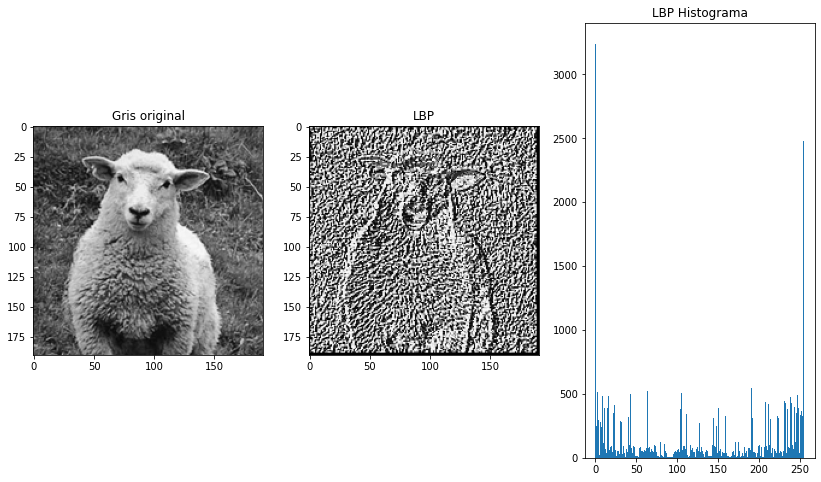

In [8]:
########################### LBP figura 5 #######################################
Img_LBP5=getLBP_image(gray5)
vector_imgLBP5 = Img_LBP5.flatten()

# Nueva figura
fig = plt.figure()
plt.figure(figsize=(14,8))

# Imagen original
ax1=plt.subplot(131)
ax1.imshow(gray5,cmap="gray")
ax1.set_title('Gris original')

# Imagen original
ax1=plt.subplot(132)
ax1.imshow(Img_LBP5,cmap="gray")
ax1.set_title('LBP')

# Imagen original
ax1=plt.subplot(133)
ax1.hist(vector_imgLBP5,bins=2**8)
ax1.set_title('LBP Histograma')

#plt.tight_layout()    
plt.show()

<Figure size 432x288 with 0 Axes>

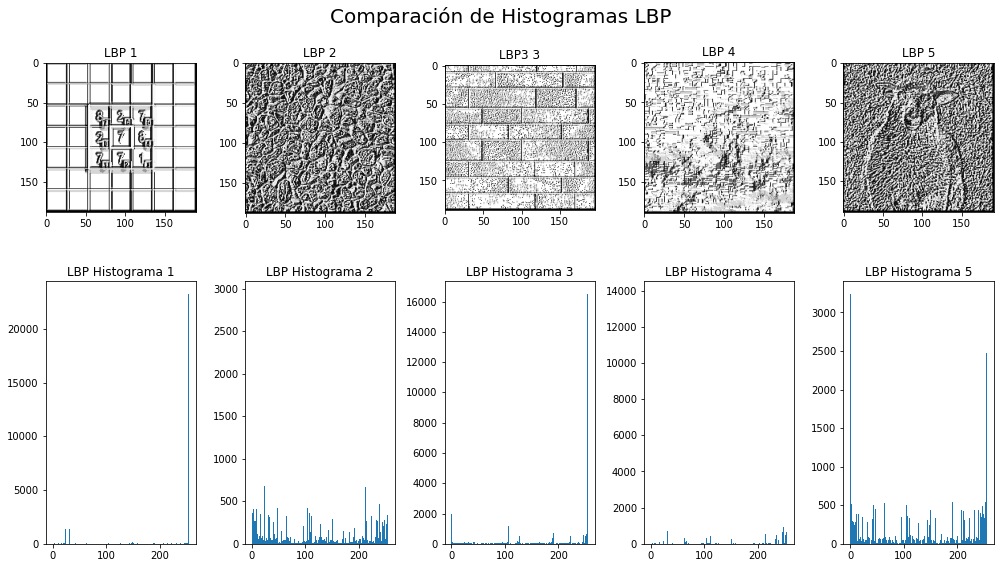

In [9]:
############################Histogramas LBP ####################################

# Nueva figura
fig = plt.figure()
plt.figure(figsize=(14,8))
plt.suptitle('Comparación de Histogramas LBP',fontsize=20)


# Imagen original
ax1=plt.subplot(251)
ax1.imshow(Img_LBP1,cmap="gray")
ax1.set_title('LBP 1')

ax1=plt.subplot(256)
ax1.hist(vector_imgLBP1,bins=2**8)
ax1.set_title('LBP Histograma 1')
#######################################
ax1=plt.subplot(252)
ax1.imshow(Img_LBP2,cmap="gray")
ax1.set_title('LBP 2')

ax1=plt.subplot(257)
ax1.hist(vector_imgLBP2,bins=2**8)
ax1.set_title('LBP Histograma 2')
#######################################
ax1=plt.subplot(253)
ax1.imshow(Img_LBP3,cmap="gray")
ax1.set_title('LBP3 3')

ax1=plt.subplot(258)
ax1.hist(vector_imgLBP3,bins=2**8)
ax1.set_title('LBP Histograma 3')
#######################################
ax1=plt.subplot(254)
ax1.imshow(Img_LBP4,cmap="gray")
ax1.set_title('LBP 4')

ax1=plt.subplot(259)
ax1.hist(vector_imgLBP4,bins=2**8)
ax1.set_title('LBP Histograma 4')
#######################################
ax1=plt.subplot(255)
ax1.imshow(Img_LBP5,cmap="gray")
ax1.set_title('LBP 5')

ax1=plt.subplot(2,5,10)
ax1.hist(vector_imgLBP5,bins=2**8)
ax1.set_title('LBP Histograma 5')

plt.tight_layout()  
plt.show()